# Problem Statement
Currently the latest AWS Deep Learning Container (DLC) for Hugging Face's `transformers` library supports version 4.17.0 while, at time of writing (29 Nov 2022), the latest publicly available version of `transformers` is 4.24.0

This matters because newer models like BLOOM and Whisper will require a version of `transformers` greater than 4.17.0. See below what happens if we try to deploy the BLOOM model directly from the Hugging Face Model Hub into the latest DLC.

In [1]:
from sagemaker.huggingface import HuggingFaceModel
import sagemaker

role = sagemaker.get_execution_role()

We use the [BLOOM-560M](https://huggingface.co/bigscience/bloom-560m) model to test the DLC

In [2]:
hub = {
    'HF_MODEL_ID':'bigscience/bloom-560m',
    'HF_TASK':'text-generation'
}

In [3]:
huggingface_model = HuggingFaceModel(
    env=hub,
    role=role,
    transformers_version="4.17",
    pytorch_version="1.10",
    py_version="py38",
)

In [4]:
predictor = huggingface_model.deploy(
    initial_instance_count=1,
    instance_type="ml.g4dn.xlarge"
)

--------!

The model deployed just fine and we have a running endpoint. However, when we try to send an inference request, we get an error:

In [ ]:
data = {"inputs": "And this is where the problem lies"}

predictor.predict(data)

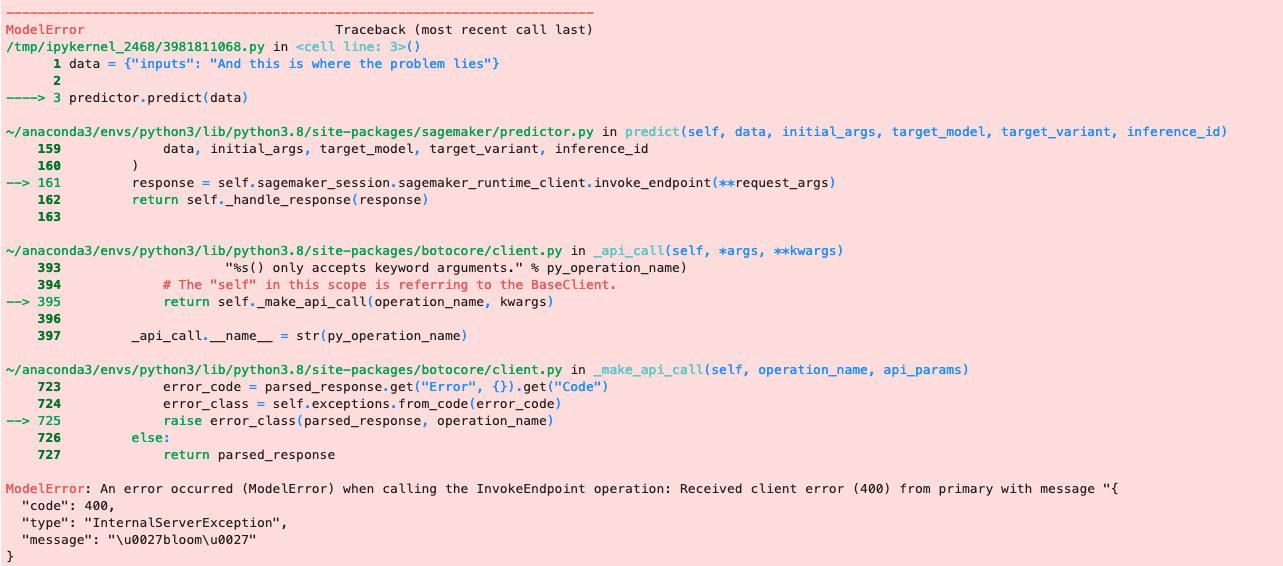

This is a typical error message that we will receive when a model is not supported at the `transformers` version that has been used (4.17.0 in our case). We can see in the [release notes](https://github.com/huggingface/transformers/releases/tag/v4.20.0) that BLOOM requires `transformers` version >= 4.20.0

In [ ]:
predictor.delete_endpoint()